# ベンチマークデータを扱ってみる

In [8]:
import os
import sys
import torch
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx
from utils import network_to_image
sys.path.append("../codes")
%matplotlib inline

In [5]:
dataset = TUDataset(root='data/TUDataset', name='COLLAB')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: COLLAB(5000):
Number of graphs: 5000
Number of features: 0
Number of classes: 3

Data(edge_index=[2, 1980], y=[1])
Number of nodes: 45
Number of edges: 1980
Average node degree: 44.00
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [6]:
G = to_networkx(data)
G = nx.Graph(G)
# origin image save
img = network_to_image(G, shuffle=True)

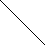

In [15]:
data_name = "DD"
save_dir = "data/TUDataset/{}/".format(data_name)



dataset = TUDataset(root='data/TUDataset', name=data_name)

# 保存先ファイルを作成
for label in range(dataset.num_classes):
    os.makedirs("data/TUDataset/{}/shuffle/{}".format(data_name,label))
    os.makedirs("data/TUDataset/{}/sort/{}".format(data_name,label))
    

cnt = 0
for data in tqdm(dataset):
    label = data.y.item()
    
    G = to_networkx(data)
    G = nx.Graph(G)
    
    # origin image save
    img = network_to_image(G, shuffle=True)
    img.save(save_dir + "shuffle/" + str(label) + "/" + str(cnt) + ".png")
    # sort image save
    img = network_to_image(G, sort=True)
    img.save(save_dir + "sort/" + str(label) + "/" + str(cnt) + ".png")

    cnt += 1

Extracting data/TUDataset/DD/DD.zip
Processing...


  0%|          | 0/1178 [00:00<?, ?it/s]

Done!


100%|██████████| 1178/1178 [00:18<00:00, 64.44it/s] 


2